In [306]:
from os.path import basename, exists
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
import json
from matplotlib.colors import ListedColormap

In [307]:
# Load the data from MITRE ATT&CK softwares (https://attack.mitre.org/software/)
with open('software_techniques.json') as f:
    software_techniques = json.load(f)

In [308]:
# Load the data from the tactics json file
with open('tactics_techniques.json') as f:
    tactics_data = json.load(f)

# Convert tactics data to a dictionary
tactics_dict = {}
for item in tactics_data:
    for technique in item["techniques"]:
        tactics_dict[technique["id"]] = item["tactic"]

In [309]:
# Maps to store nodes of each tactic
tactics = {
    'Initial Access': [],
    'Execution': [],
    'Persistence': [],
    'Privilege Escalation': [],
    'Defense Evasion': [],
    'Credential Access': [],
    'Discovery': [],
    'Lateral Movement': [],
    'Collection': [],
    'Command and Control': [],
    'Exfiltration': [],
    'Impact': [],
}

colors = ['red', 'orange', 'yellow', 'lightgreen', 'green', 'lightblue', 'blue', 'purple', 'violet', 'brown', 'pink', 'grey']

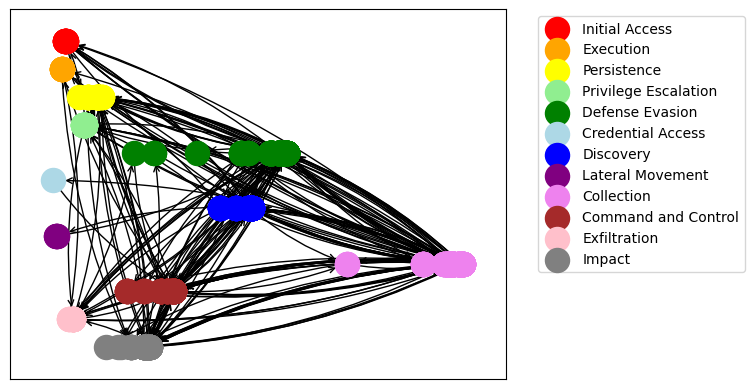

In [310]:
G = nx.DiGraph()

# Add nodes to the graph and store their positions
pos = {}
last_technique = None  # Store the last technique for each software

for software in software_techniques:
    software_id = software["software_id"]
    software_techniques_list = software["techniques"]
    first_technique_id = software_techniques_list[0]["technique_id"]

    for i, technique in enumerate(software_techniques_list):
        technique_id = technique["technique_id"]
        tactic = tactics_dict.get(technique_id)
        if tactic:  # Only add the node if we know the tactic
            G.add_node(technique_id, tactic=tactic)
            tactics[tactic].append(technique_id)

        if i > 0 and technique_id != first_technique_id:  # Connect the current technique with the previous one, excluding self-loops
            G.add_edge(technique_id, software_techniques_list[i-1]["technique_id"])  # Reverse the order of the nodes

# Calculate the number of techniques in each tactic
tactic_counts = {tactic: len(nodes) for tactic, nodes in tactics.items()}

# Calculate the spacing between nodes within each tactic
spacing = 1 / max(tactic_counts.values())

# Set the initial y-position for each tactic
y_positions = {tactic: -i for i, tactic in enumerate(tactics.keys())}

# Set the positions for the nodes within each tactic
for tactic, nodes in tactics.items():
    y = y_positions[tactic]
    for i, node in enumerate(nodes):
        x = i * spacing
        pos[node] = (x, y)

# Draw the nodes and edges
for tactic, color in zip(tactics.keys(), colors):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=tactics[tactic], node_color=color, label=tactic)
nx.draw_networkx_edges(G, pos=pos, arrows=True, arrowstyle='->', connectionstyle='arc3,rad=0.1')  # Set arrows=True, arrowstyle='->', and connectionstyle='arc3,rad=0.1'

# Add labels for the nodes
# labels = {node: node for node in G.nodes()}
# nx.draw_networkx_labels(G, pos=pos, labels=labels)

# Adjust the position of the legend
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('figs/degree_centrality/attack_paths_network_graph.png', dpi=300, bbox_inches='tight')

plt.show()

In [311]:
degree_centrality = nx.degree_centrality(G)
degree_centrality

{'T1626': 0.06451612903225806,
 'T1517': 0.08064516129032258,
 'T1437': 0.29032258064516125,
 'T1429': 0.25806451612903225,
 'T1623': 0.0967741935483871,
 'T1533': 0.3064516129032258,
 'T1407': 0.3709677419354839,
 'T1646': 0.22580645161290322,
 'T1404': 0.22580645161290322,
 'T1629': 0.16129032258064516,
 'T1544': 0.0967741935483871,
 'T1430': 0.3870967741935484,
 'T1406': 0.3225806451612903,
 'T1636': 0.3387096774193548,
 'T1418': 0.1935483870967742,
 'T1426': 0.1935483870967742,
 'T1422': 0.1774193548387097,
 'T1512': 0.1774193548387097,
 'T1633': 0.0967741935483871,
 'T1474': 0.0967741935483871,
 'T1577': 0.04838709677419355,
 'T1643': 0.22580645161290322,
 'T1628': 0.27419354838709675,
 'T1630': 0.2096774193548387,
 'T1424': 0.0967741935483871,
 'T1624': 0.27419354838709675,
 'T1644': 0.0967741935483871,
 'T1481': 0.08064516129032258,
 'T1532': 0.06451612903225806,
 'T1616': 0.11290322580645161,
 'T1471': 0.08064516129032258,
 'T1417': 0.3064516129032258,
 'T1513': 0.0967741935483

In [312]:
# Create a dictionary to map IDs to names
id_to_name = {}
for tactic in tactics_data:
    for technique in tactic['techniques']:
        id_to_name[technique['id']] = technique['name']

# Create a new dictionary with names as keys
degree_centrality_names = {}
for id, centrality in degree_centrality.items():
    name = id_to_name.get(id, id)  # If the ID is not found in the mapping, use the ID itself
    degree_centrality_names[name] = centrality

In [313]:
for name, centrality in degree_centrality_names.items():
    print(f"{name}: {centrality}")

Abuse Elevation Control Mechanism: 0.06451612903225806
Access Notifications: 0.08064516129032258
Application Layer Protocol: 0.29032258064516125
Audio Capture: 0.25806451612903225
Command and Scripting Interpreter: 0.0967741935483871
Data from Local System: 0.3064516129032258
Download New Code at Runtime: 0.3709677419354839
Exfiltration Over C2 Channel: 0.22580645161290322
Exploitation for Privilege Escalation: 0.22580645161290322
Impair Defenses: 0.16129032258064516
Ingress Tool Transfer: 0.0967741935483871
Location Tracking: 0.3870967741935484
Obfuscated Files or Information: 0.3225806451612903
Protected User Data: 0.3387096774193548
Software Discovery: 0.1935483870967742
System Information Discovery: 0.1935483870967742
System Network Configuration Discovery: 0.1774193548387097
Video Capture: 0.1774193548387097
Virtualization/Sandbox Evasion: 0.0967741935483871
Supply Chain Compromise: 0.0967741935483871
Compromise Application Executable: 0.04838709677419355
Generate Traffic from Vic

In [314]:
# Find the minimum and maximum centrality scores
min_score = min(degree_centrality_names.values())
max_score = max(degree_centrality_names.values())

# Perform min-max normalization on the centrality scores
normalized_scores = {}
for name, centrality in degree_centrality_names.items():
    normalized_score = (centrality - min_score) / (max_score - min_score)
    normalized_scores[name] = normalized_score

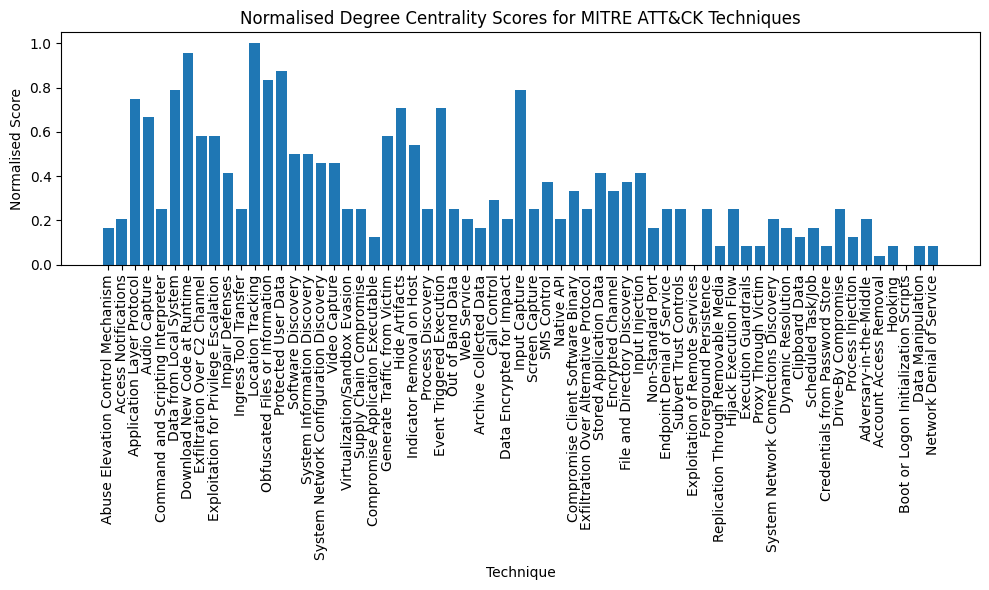

In [315]:
# Prepare the data for plotting
names = list(normalized_scores.keys())
scores = list(normalized_scores.values())

# Plot the normalized scores
plt.figure(figsize=(10, 6))
plt.bar(names, scores)
plt.xlabel('Technique')
plt.ylabel('Normalised Score')
plt.title('Normalised Degree Centrality Scores for MITRE ATT&CK Techniques')
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig('figs/degree_centrality/techniques_degree_centrality_normalised.png', dpi=300, bbox_inches='tight')

plt.show()

In [316]:
import requests
from bs4 import BeautifulSoup
import time

base_url = "https://attack.mitre.org"

def get_mitigations(url):
    mitigations = {}

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # find and loop through each row in the table
    for row in soup.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) > 1:
            mitigation_name = cells[1].text.strip()
            mitigation_link = cells[0].find('a')['href']

            techniques = get_techniques(base_url + mitigation_link)

            # Add the set of techniques to the dictionary
            mitigations[mitigation_name] = techniques

            # Avoid making requests too quickly
            time.sleep(1)

    return mitigations

def get_techniques(url):
    techniques = set()

    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # find and loop through each row in the techniques addressed table
    techniques_table = soup.find("table", class_="table techniques-used background table-bordered")
    if techniques_table:
        for row in techniques_table.find_all('tr', class_='technique mobile'):
            cells = row.find_all('td')
            if len(cells) > 1:
                technique_name = cells[-2].text.strip() 
                techniques.add(technique_name)

    return techniques

# Scrape the data
mitigations = get_mitigations("https://attack.mitre.org/mitigations/mobile/")

# Print the data
print(mitigations)


{'Application Developer Guidance': {'Abuse Elevation Control Mechanism', 'Supply Chain Compromise', 'Access Notifications', 'Screen Capture', 'Steal Application Access Token'}, 'Attestation': {'Hooking', 'Compromise Client Software Binary', 'Indicator Removal on Host', 'Exploitation for Privilege Escalation', 'Hijack Execution Flow', 'Credentials from Password Store', 'Boot or Logon Initialization Scripts', 'Process Discovery', 'Command and Scripting Interpreter'}, 'Deploy Compromised Device Detection Method': {'Hooking', 'Exploitation for Privilege Escalation', 'Credentials from Password Store', 'Impair Defenses', 'Command and Scripting Interpreter'}, 'Encrypt Network Traffic': {'Adversary-in-the-Middle'}, 'Enterprise Policy': {'Input Injection', 'Lockscreen Bypass', 'Access Notifications', 'Screen Capture', 'Exploitation of Remote Services', 'Replication Through Removable Media', 'Subvert Trust Controls', 'Location Tracking', 'Input Capture', 'Impair Defenses'}, 'Interconnection Filt

In [317]:
for mitigation, techniques in mitigations.items():
    degree_centrality_sum = 0
    for technique in techniques:
        degree_centrality = degree_centrality_names.get(technique, 0)
        degree_centrality_sum += degree_centrality
    mitigation_degree_centrality[mitigation] = degree_centrality_sum
    
for mitigation, centrality in mitigation_degree_centrality.items():
    print(f"{mitigation}: {centrality}")

Application Developer Guidance: 0.33870967741935487
Attestation: 0.9193548387096775
Deploy Compromised Device Detection Method: 0.5483870967741935
Encrypt Network Traffic: 0.08064516129032258
Enterprise Policy: 1.3225806451612905
Interconnection Filtering: 0.3870967741935484
Lock Bootloader: 0.16129032258064516
Security Updates: 1.032258064516129
System Partition Integrity: 0.3870967741935484
Use Recent OS Version: 3.3548387096774195
User Guidance: 3.14516129032258


In [318]:
# Normalise the data 
min_value = min(mitigation_degree_centrality.values())
max_value = max(mitigation_degree_centrality.values())

normalised_mit_degree = {key: (value - min_value) / (max_value - min_value) for key, value in mitigation_degree_centrality.items()}

print("--Normalised mitigation degree centrality--")
for key, value in normalised_mit_degree.items():
    print(f"{key}: {value}")

--Normalised mitigation degree centrality--
Application Developer Guidance: 0.0788177339901478
Attestation: 0.2561576354679803
Deploy Compromised Device Detection Method: 0.14285714285714285
Encrypt Network Traffic: 0.0
Enterprise Policy: 0.37931034482758624
Interconnection Filtering: 0.09359605911330049
Lock Bootloader: 0.02463054187192118
Security Updates: 0.29064039408866993
System Partition Integrity: 0.09359605911330049
Use Recent OS Version: 1.0
User Guidance: 0.9359605911330047


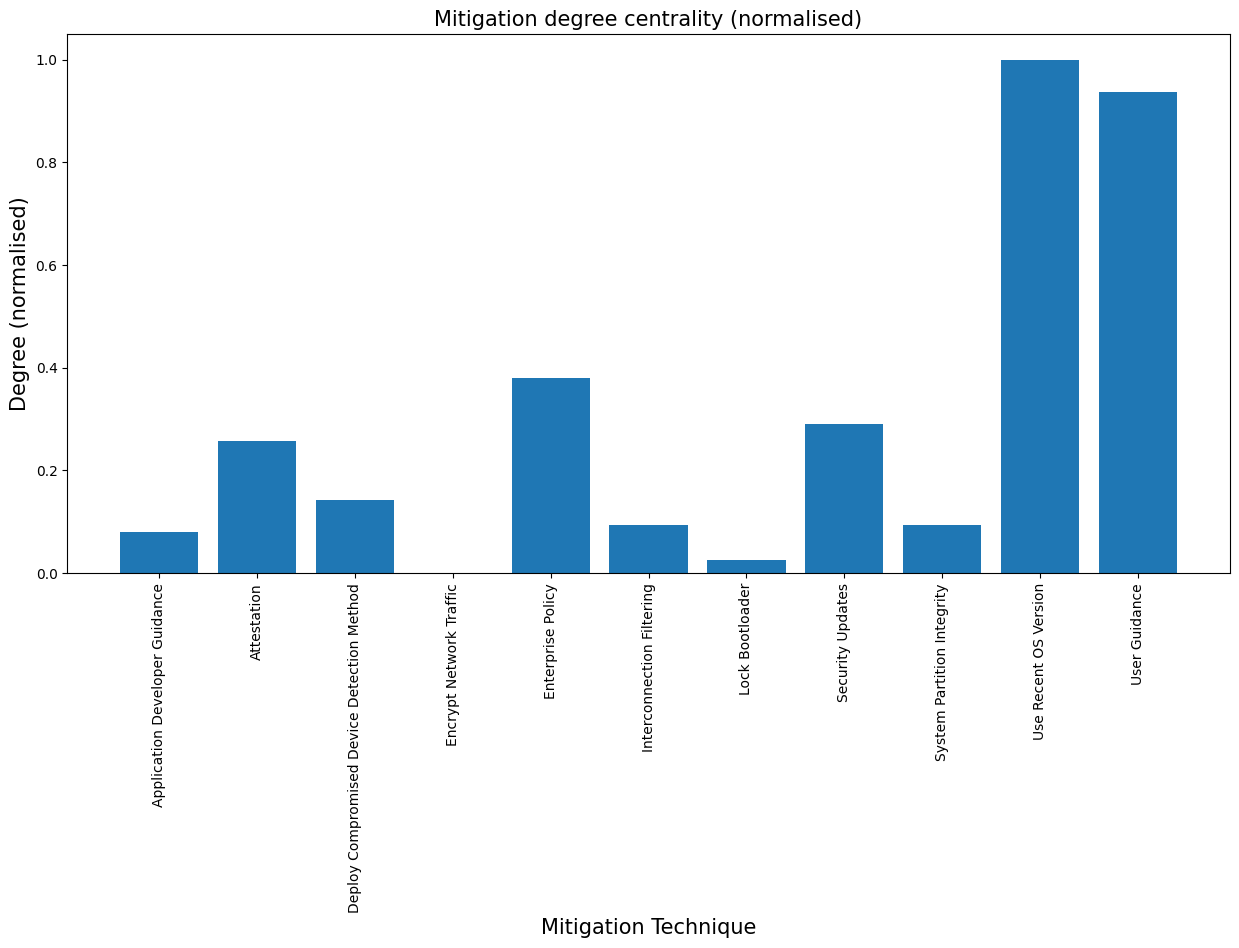

In [319]:
i=normalised_mit_degree.keys()
j=normalised_mit_degree.values()

plt.figure(figsize=[15, 7])
plt.bar(i,j)

plt.title('Mitigation degree centrality (normalised)', fontsize=15)
plt.xlabel('Mitigation Technique', fontsize=15)
plt.ylabel('Degree (normalised)', fontsize=15)
plt.xticks(rotation=90)

plt.savefig('figs/degree_centrality/mitigations_degree_centrality_normalised.png', dpi=300, bbox_inches='tight')


plt.show()

In [320]:
thresholds = {'low': (0.0, 0.1), 'medium': (0.1, 0.7), 'high': (0.7, 1.0)}

def find_label(value, thresholds):
    for label, (min_val, max_val) in thresholds.items():
        if min_val <= value <= max_val:
            return label

categorised_items = {'low': [], 'medium': [], 'high': []}

for key, value in normalised_mit_degree.items():
    label = find_label(value, thresholds)
    categorised_items[label].append((key, value))

for label, items in categorised_items.items():
    print(f"{label.capitalize()}:")
    for item in items:
        print(f"  {item[0]}: {item[1]}")
    print()

Low:
  Application Developer Guidance: 0.0788177339901478
  Encrypt Network Traffic: 0.0
  Interconnection Filtering: 0.09359605911330049
  Lock Bootloader: 0.02463054187192118
  System Partition Integrity: 0.09359605911330049

Medium:
  Attestation: 0.2561576354679803
  Deploy Compromised Device Detection Method: 0.14285714285714285
  Enterprise Policy: 0.37931034482758624
  Security Updates: 0.29064039408866993

High:
  Use Recent OS Version: 1.0
  User Guidance: 0.9359605911330047



In [321]:
# Create a copy of the original dictionary
filtered_mitigations = mitigation_degree_centrality.copy()

# Remove 'Use Recent OS Version' and 'User Guidance' from the copied dictionary
del filtered_mitigations['Use Recent OS Version']
del filtered_mitigations['User Guidance']

# Normalize the data
min_value = min(filtered_mitigations.values())
max_value = max(filtered_mitigations.values())

normalised_filtered_degree = {
    key: (value - min_value) / (max_value - min_value)
    for key, value in filtered_mitigations.items()
}

print("-- Normalised mitigation degree centrality --")
for key, value in normalised_filtered_degree.items():
    print(f"{key}: {value}")


-- Normalised mitigation degree centrality --
Application Developer Guidance: 0.2077922077922078
Attestation: 0.6753246753246752
Deploy Compromised Device Detection Method: 0.3766233766233765
Encrypt Network Traffic: 0.0
Enterprise Policy: 1.0
Interconnection Filtering: 0.24675324675324672
Lock Bootloader: 0.06493506493506492
Security Updates: 0.766233766233766
System Partition Integrity: 0.24675324675324672


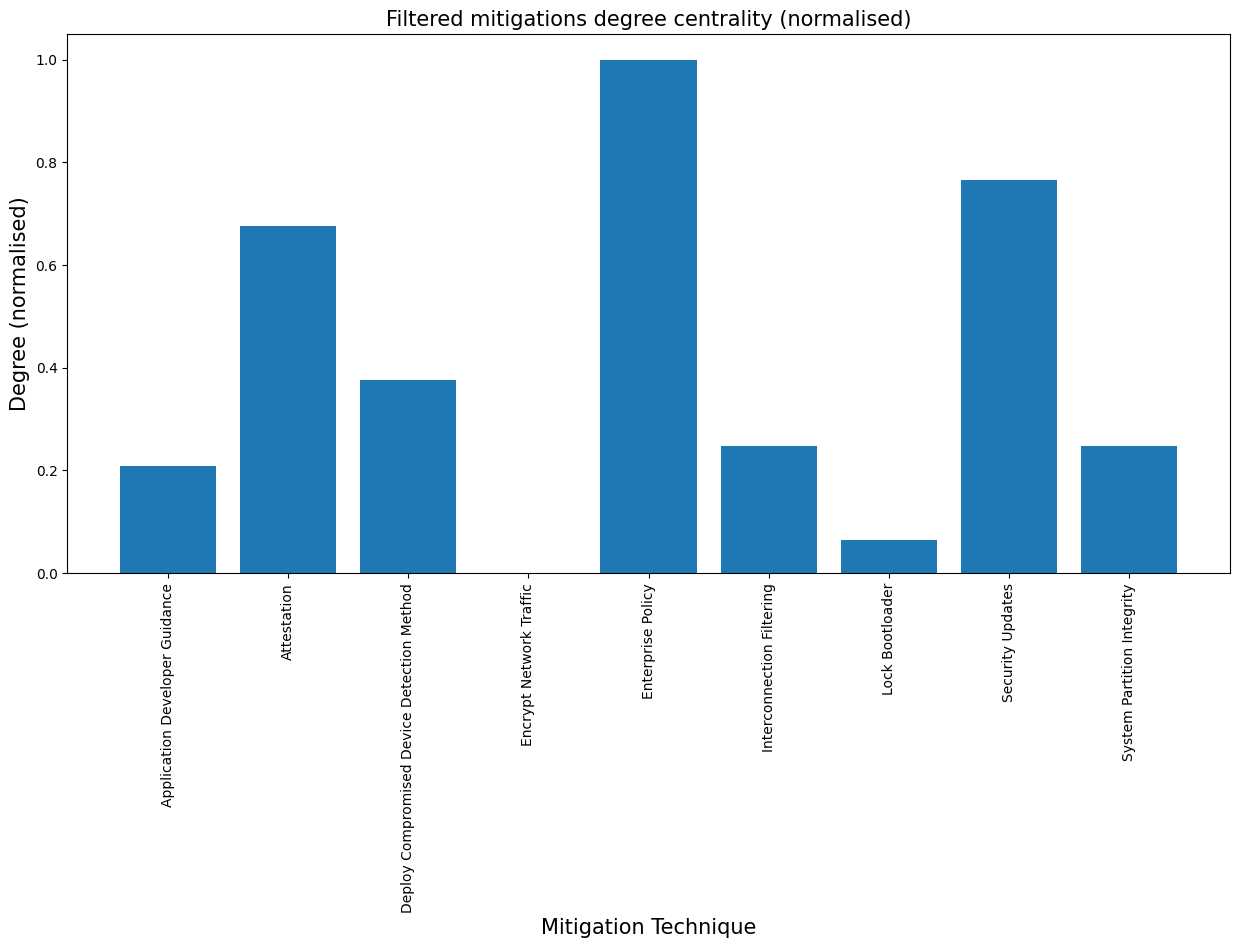

In [322]:
i=normalised_filtered_degree.keys()
j=normalised_filtered_degree.values()

plt.figure(figsize=[15, 7])
plt.bar(i,j)

plt.title('Filtered mitigations degree centrality (normalised)', fontsize=15)
plt.xlabel('Mitigation Technique', fontsize=15)
plt.ylabel('Degree (normalised)', fontsize=15)
plt.xticks(rotation=90)

plt.savefig('figs/degree_centrality/filtered_mitigations_degree_centrality_normalised.png', dpi=300, bbox_inches='tight')

plt.show()

In [323]:
thresholds = {'low': (0.0, 0.33), 'medium': (0.25, 0.66), 'high': (0.66, 1.0)}

def find_label(value, thresholds):
    for label, (min_val, max_val) in thresholds.items():
        if min_val <= value <= max_val:
            return label

categorised_items = {'low': [], 'medium': [], 'high': []}

for key, value in normalised_filtered_degree.items():
    label = find_label(value, thresholds)
    categorised_items[label].append((key, value))

for label, items in categorised_items.items():
    print(f"{label.capitalize()}:")
    for item in items:
        print(f"  {item[0]}: {item[1]}")
    print()

Low:
  Application Developer Guidance: 0.2077922077922078
  Encrypt Network Traffic: 0.0
  Interconnection Filtering: 0.24675324675324672
  Lock Bootloader: 0.06493506493506492
  System Partition Integrity: 0.24675324675324672

Medium:
  Deploy Compromised Device Detection Method: 0.3766233766233765

High:
  Attestation: 0.6753246753246752
  Enterprise Policy: 1.0
  Security Updates: 0.766233766233766



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


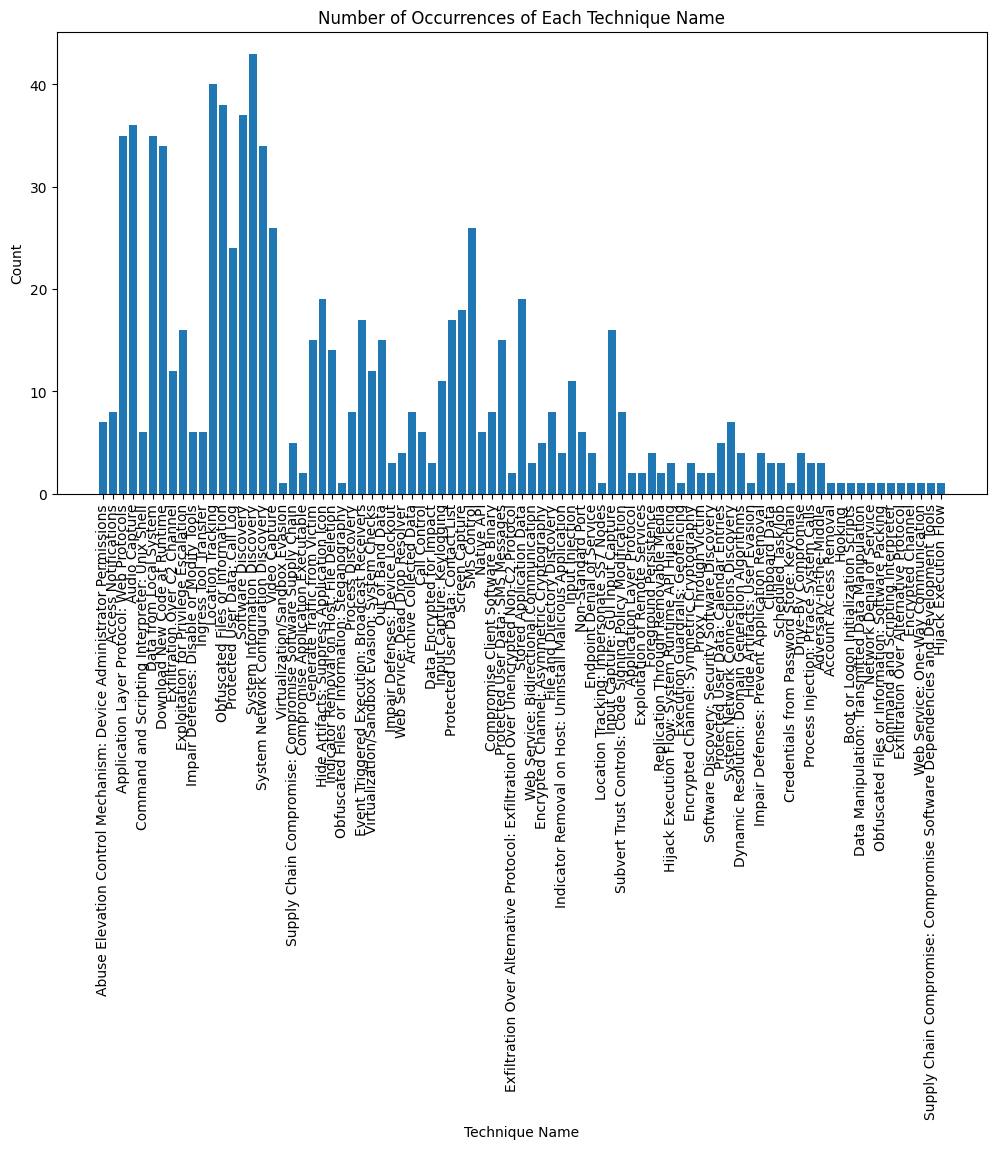

In [324]:
# Count the occurrences of each technique name
technique_counts = {}
for software in software_techniques:
    for technique in software['techniques']:
        technique_name = technique['technique_name']
        technique_counts[technique_name] = technique_counts.get(technique_name, 0) + 1

# Create the bar plot
technique_names = list(technique_counts.keys())
counts = list(technique_counts.values())

plt.figure(figsize=(12, 6))

plt.bar(range(len(counts)), counts)
plt.xticks(range(len(technique_names)), technique_names, rotation=90)
plt.xlabel('Technique Name')
plt.ylabel('Count')
plt.title('Number of Occurrences of Each Technique Name')
plt.tight_layout()
plt.show()
